# Playing with the Heart Disease dataset from UCI

* Start date: 21-03-2019
* End date: 
* Hours spent (approx.): 

**Structure:**
1. Importing the basic libraries and methods
2. Importing the dataset
3. Cleaning and basic exploration of the dataset
4. Exploring the dataset using visualizations (Python for Data Science A-Z)
5. Modeling (Machine Learning A-Z)
6. Explaining the model using [Machine Learning Explainability](https://www.kaggle.com/learn/machine-learning-explainability)

---

## 1. Importing the libraries

In [125]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import math
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = 8,6

---

## 2. Importing the dataset

In [52]:
dataset = pd.read_csv('heart.csv')

-----

## 3. Exploring the dataset

In [53]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


### Checking for null values

In [6]:
dataset.isnull().values.sum()
# dataset.isnull().sum().sum()
# dataset.columns.isnull()
# dataset.columns.isnull().sum()
# other variations exist

0

### Changing column names for better understanding

In [180]:
dataset.columns = ['Age', 'Sex', 'ChestPain', 'RestingBP', 'Cholestrol', 'FastingBloodSugar', 'RestingECG',
                  'MaxHeartRate', 'ExerciseInducedAngina', 'STDepression', 'SlopePeakSTSegment',
                  'MajorVessels', 'Thalassaemia', 'HeartDisease']

In [181]:
dataset.head(10)

,Age,Sex,ChestPain,RestingBP,Cholestrol,FastingBloodSugar,RestingECG,MaxHeartRate,ExerciseInducedAngina,STDepression,SlopePeakSTSegment,MajorVessels,Thalassaemia,HeartDisease
0,63,male,3,145,233,greater than 120 mg/dl,0,150,no,2.3,0,0,normal,yes
1,37,male,2,130,250,less than 120 mg/dl,1,187,no,3.5,0,0,fixed defect,yes
2,41,female,1,130,204,less than 120 mg/dl,0,172,no,1.4,2,0,fixed defect,yes
3,56,male,1,120,236,less than 120 mg/dl,1,178,no,0.8,2,0,fixed defect,yes
4,57,female,0,120,354,less than 120 mg/dl,1,163,yes,0.6,2,0,fixed defect,yes
5,57,male,0,140,192,less than 120 mg/dl,1,148,no,0.4,1,0,normal,yes
6,56,female,1,140,294,less than 120 mg/dl,0,153,no,1.3,1,0,fixed defect,yes
7,44,male,1,120,263,less than 120 mg/dl,1,173,no,0.0,2,0,reversable defect,yes
8,52,male,2,172,199,greater than 120 mg/dl,1,162,no,0.5,2,0,reversable defect,yes
9,57,male,2,150,168,less than 120 mg/dl,1,174,no,1.6,2,0,fixed defect,yes


### Changing datatype of categorical data

In [182]:
# Function to change datatype of categorical data
def change_dt(dataframe, cols):
    for cname in cols:
        dataframe[cname] = dataframe[cname].astype('category')
    dataframe.info()

In [183]:
change_dt(dataset, ['Sex', 'ChestPain', 'FastingBloodSugar', 'RestingECG', 'ExerciseInducedAngina', 'Thalassaemia',
                   'HeartDisease'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
Age                      303 non-null int64
Sex                      303 non-null category
ChestPain                303 non-null category
RestingBP                303 non-null int64
Cholestrol               303 non-null int64
FastingBloodSugar        303 non-null category
RestingECG               303 non-null category
MaxHeartRate             303 non-null int64
ExerciseInducedAngina    303 non-null category
STDepression             303 non-null float64
SlopePeakSTSegment       303 non-null int64
MajorVessels             303 non-null int64
Thalassaemia             303 non-null category
HeartDisease             303 non-null category
dtypes: category(7), float64(1), int64(6)
memory usage: 19.6 KB


### Naming the encoded categorical data to improve readability of the visualizations

In [184]:
dataset.Sex[dataset.Sex == 1] = 'male'
dataset.Sex[dataset.Sex == 0] = 'female'

dataset.FastingBloodSugar[dataset.FastingBloodSugar == 1] = 'greater than 120 mg/dl'
dataset.FastingBloodSugar[dataset.FastingBloodSugar == 0] = 'less than 120 mg/dl'

dataset.ExerciseInducedAngina[dataset.ExerciseInducedAngina == 1] = 'yes'
dataset.ExerciseInducedAngina[dataset.ExerciseInducedAngina == 0] = 'no'

dataset.Thalassaemia[dataset.Thalassaemia == 1] = 'normal'
dataset.Thalassaemia[dataset.Thalassaemia == 2] = 'fixed defect'
dataset.Thalassaemia[dataset.Thalassaemia == 3] = 'reversable defect'

# Heart disease - yes or no
dataset.HeartDisease[dataset.HeartDisease == 1] = 'yes'
dataset.HeartDisease[dataset.HeartDisease == 0] = 'no'

Dropping thal = 0 indices

In [ ]:
dataset[dataset.Thalassaemia.isnull()].index.tolist()

In [335]:
dataset = dataset.drop(index = dataset[dataset.Thalassaemia.isnull()].index.tolist())

In [185]:
dataset.head()

,Age,Sex,ChestPain,RestingBP,Cholestrol,FastingBloodSugar,RestingECG,MaxHeartRate,ExerciseInducedAngina,STDepression,SlopePeakSTSegment,MajorVessels,Thalassaemia,HeartDisease
0,63,male,3,145,233,greater than 120 mg/dl,0,150,no,2.3,0,0,normal,yes
1,37,male,2,130,250,less than 120 mg/dl,1,187,no,3.5,0,0,fixed defect,yes
2,41,female,1,130,204,less than 120 mg/dl,0,172,no,1.4,2,0,fixed defect,yes
3,56,male,1,120,236,less than 120 mg/dl,1,178,no,0.8,2,0,fixed defect,yes
4,57,female,0,120,354,less than 120 mg/dl,1,163,yes,0.6,2,0,fixed defect,yes


In [186]:
dataset.describe()

,Age,RestingBP,Cholestrol,MaxHeartRate,STDepression,SlopePeakSTSegment,MajorVessels
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,1.399340,0.729373
std,9.082101,17.538143,51.830751,22.905161,1.161075,0.616226,1.022606
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,1.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,1.000000,0.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,2.000000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,2.000000,4.000000


---

## 4. Exploring the dataset using visualizations

### Plotting Heart Disease vs Age

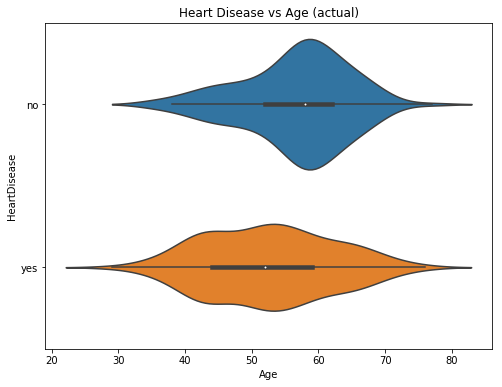

In [188]:
sns.violinplot(data = dataset, x = 'Age', y = 'HeartDisease')
plt.title("Heart Disease vs Age (actual)")
plt.show()

Higher the age, lower the chance of heart disease? Well, that's odd.

### Visualizing Chest Pain and Heart Disease

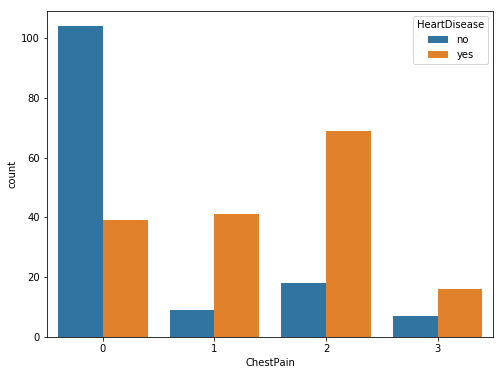

In [214]:
sns.countplot(data = dataset, x = 'ChestPain', hue = 'HeartDisease')
plt.show()

We observe that chances of heart disease being present increases with increase in chest pain.

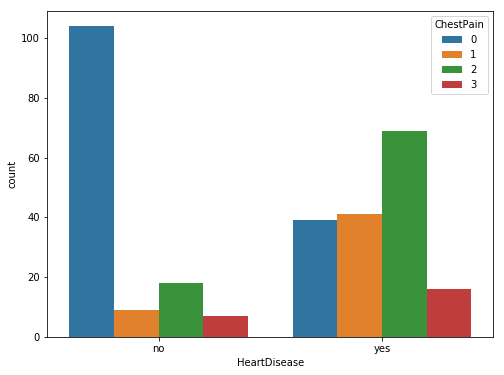

In [221]:
sns.countplot(data = dataset, x = 'HeartDisease', hue = 'ChestPain')
plt.show()
# Need to use .apply() method on the dataframe to get stacked histogram

Vice versa, presence of heart disease can be associated with chest pain.

### Chi-squared test

In [266]:
c = dataset.HeartDisease.value_counts()
type(c)

pandas.core.series.Series

In [275]:
from scipy.stats import chisquare
chisquare(c)

Power_divergenceResult(statistic=2.405940594059406, pvalue=0.12087545165055069)

### Heart Disease vs Sex

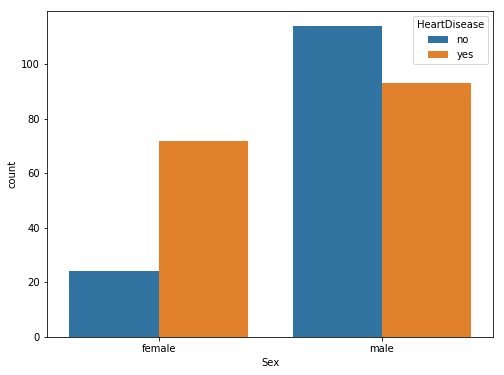

In [278]:
sns.countplot(data = dataset, x = 'Sex', hue = 'HeartDisease')
plt.show()

Females have higher instance of heart disease.

In [283]:
dataset.head()

,Age,Sex,ChestPain,RestingBP,Cholestrol,FastingBloodSugar,RestingECG,MaxHeartRate,ExerciseInducedAngina,STDepression,SlopePeakSTSegment,MajorVessels,Thalassaemia,HeartDisease
0,63,male,3,145,233,greater than 120 mg/dl,0,150,no,2.3,0,0,normal,yes
1,37,male,2,130,250,less than 120 mg/dl,1,187,no,3.5,0,0,fixed defect,yes
2,41,female,1,130,204,less than 120 mg/dl,0,172,no,1.4,2,0,fixed defect,yes
3,56,male,1,120,236,less than 120 mg/dl,1,178,no,0.8,2,0,fixed defect,yes
4,57,female,0,120,354,less than 120 mg/dl,1,163,yes,0.6,2,0,fixed defect,yes


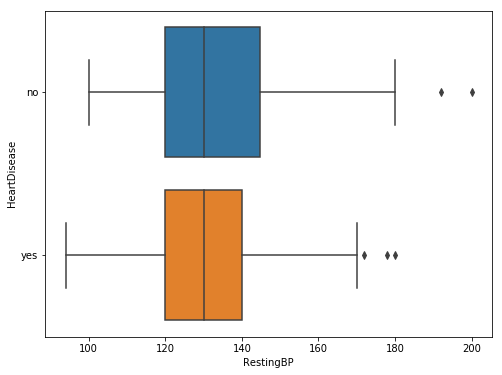

In [295]:
sns.boxplot(data = dataset, x = 'RestingBP', y = 'HeartDisease')
plt.show()

Inconclusive. For both categories of people, the median value of resting blood pressure is 130. 3rd quartile for people *not* having heart disease is higher than that for people having heart disease, which is counter-intuitive. This behaviour can be attributed to the small size of our dataset.

In [ ]:
# TODO: Add more plots

---

## 5. Modeling using Machine Learning

### Creating the matrix of features and dependent variable vector

In [637]:
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

### Encoding categorical data

#### Encoding the independent variable

In [638]:
colnums = []
for col in dataset.columns[dataset.dtypes == 'category']:
    colnums.append(dataset.columns.get_loc(col))

In [639]:
colnums

[1, 2, 5, 6, 8, 12, 13]

In [640]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_5 = LabelEncoder()
X[:, 5] = labelencoder_X_5.fit_transform(X[:, 5])
labelencoder_X_8 = LabelEncoder()
X[:, 8] = labelencoder_X_8.fit_transform(X[:, 8])
labelencoder_X_12 = LabelEncoder()
X[:, 12] = labelencoder_X_12.fit_transform(X[:, 12])
onehotencoder = OneHotEncoder(categorical_features = [1, 5, 8, 12])
X = onehotencoder.fit_transform(X).toarray()

/Users/jango/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


#### Encoding the dependent variable

In [641]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [648]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [649]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [553]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.22165236, 0.13377726])

Top variances not significant enough to select components.

In [565]:
# Applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [631]:
# Fitting Random Forest Classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [596]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [650]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [651]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

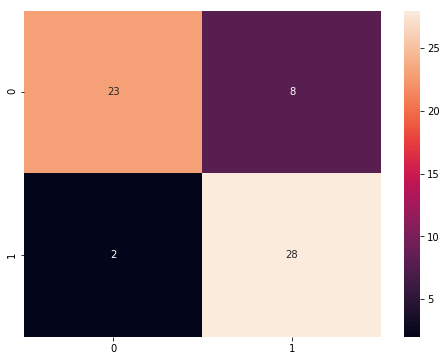

In [660]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, )
plt.show()

In [653]:
Accuracy = (cm[0, 0] + cm[1, 1]) / sum(sum(cm))
Accuracy * 100

83.60655737704919

In [654]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print(accuracies.mean())
accuracies.std()

0.8132971014492754


0.0896537438890353

In [647]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [#{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 
               'gamma': [0.009, 0.008, 0.007, 0.006, 0.005, 0.004, 0.003, 0.002, 0.001]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_accuracy)
best_parameters

0.8438538205980066


/Users/jango/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 1, 'gamma': 0.006, 'kernel': 'rbf'}

In [634]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [10, 100, 1000], 
               'criterion': ['entropy', 'gini']}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_accuracy)
best_parameters

/Users/jango/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.8338870431893688


{'criterion': 'entropy', 'n_estimators': 1000}

In [ ]:
def modeler(modelname, X, y):
    
    

In [ ]:
modeler(log_reg, X, y)

## 6. Explaining the model using Machine Learning Explainability

In [661]:
# Permutation Importance
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(classifier, random_state = 0).fit(X_test, y_test)
eli5.show_weights(perm)

Weight,Feature
0.0393 ± 0.0918,x17
0.0393 ± 0.0533,x15
0.0295 ± 0.0382,x6
0.0262 ± 0.0161,x9
0.0262 ± 0.0334,x8
0.0197 ± 0.0482,x10
0.0164 ± 0.0293,x13
0.0131 ± 0.0245,x14
0.0098 ± 0.0161,x16
0.0066 ± 0.0262,x11
